In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

import dtreeviz
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

import time
import datetime
import re

In [2]:
df_agg = pd.read_csv('./new_data/aggregated_data.csv')

list_id=df_agg.identifier.to_list()
cols=['Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17',
      'propagationTime','messageOverhead','bandwidth']
selected_columns=df_agg[cols]

# Create the scaler.
scaler = StandardScaler().fit(selected_columns)
standardized_columns = scaler.transform(selected_columns)
df_std=pd.DataFrame(standardized_columns, columns=cols)

X=df_std[cols]

In [3]:
# KMeans centroids used on paper experiments
centroids=[[-2.49669071e+00, -2.48587173e+00, -3.16643460e-01, -3.47291694e-01,
   8.54716107e-01, -3.97157523e-01, -6.70897367e-02,  6.15820458e-01,
   6.51438125e-01],
 [-2.03820669e-01, -2.06333633e-01, -9.04695601e-03, -9.90150787e-02,
  -6.75117532e-01, -1.64249709e-01, -2.63086801e-01, -1.09380458e+00,
  -1.10281149e+00],
 [ 1.45779022e-01,  1.51610365e-01,  3.03073026e+00,  3.16996035e+00,
   2.48841398e-01, -7.00271002e-01,  2.83955499e+00, -2.09193932e-01,
   2.72116222e-03],
 [ 4.81430719e-01,  4.80847076e-01, -3.81264575e-01, -3.32513324e-01,
   3.24575737e-01,  2.74096724e-01, -2.08147322e-01,  7.23199481e-01,
   6.94271169e-01]]

In [4]:
# Create and fit the K-Means model
kmeans = KMeans(n_clusters=4, init=centroids) 
kmeans.fit(X)
labelsKM = kmeans.labels_
df_std['cluster_label']=labelsKM

# Create and fit the AgglomerativeClustering model
ac = AgglomerativeClustering(n_clusters=4)
labelsAC = ac.fit_predict(X)
df_std['cluster_label']=labelsAC

/Users/jorge.meira/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [5]:
df_Clusters = df_agg.copy()
df_Clusters["KM"]=labelsKM
df_Clusters["AC"]=labelsAC

In [6]:
df_Clusters.groupby(['KM', 'AC']).count()[["Type2"]]

Type2
KM AC       
0  0       2
1  3      10
2  1       2
3  0       5
   2       9

In [7]:
df_C0=df_Clusters[(df_Clusters['KM']==3) & (df_Clusters['AC']==0)][['identifier', 
        'topology', 'd', 'dlo', 'dhi', 'dscore', 'dlazy', 'dout',
        'gossipFactor', 'interval', 'n_nodes', 'consensus', 'propagationTime',
        'messageOverhead', 'bandwidth', 'Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17']]
df_C0['cluster']=0

In [8]:
df_C1=df_Clusters[(df_Clusters['KM']==1) & (df_Clusters['AC']==3)][['identifier', 
        'topology', 'd', 'dlo', 'dhi', 'dscore', 'dlazy', 'dout',
        'gossipFactor', 'interval', 'n_nodes', 'consensus', 'propagationTime',
        'messageOverhead', 'bandwidth', 'Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17']]
df_C1['cluster']=1

In [9]:
df_C2=df_Clusters[(df_Clusters['KM']==2) & (df_Clusters['AC']==1)][['identifier', 
        'topology', 'd', 'dlo', 'dhi', 'dscore', 'dlazy', 'dout',
        'gossipFactor', 'interval', 'n_nodes', 'consensus', 'propagationTime',
        'messageOverhead', 'bandwidth', 'Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17']]
df_C2['cluster']=2

In [10]:
df_C3=df_Clusters[(df_Clusters['KM']==3) & (df_Clusters['AC']==2)][['identifier', 
        'topology', 'd', 'dlo', 'dhi', 'dscore', 'dlazy', 'dout',
        'gossipFactor', 'interval', 'n_nodes', 'consensus', 'propagationTime',
        'messageOverhead', 'bandwidth', 'Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17']]
df_C3['cluster']=3

In [11]:
df_C4=df_Clusters[(df_Clusters['KM']==0) & (df_Clusters['AC']==0)][['identifier', 
        'topology', 'd', 'dlo', 'dhi', 'dscore', 'dlazy', 'dout',
        'gossipFactor', 'interval', 'n_nodes', 'consensus', 'propagationTime',
        'messageOverhead', 'bandwidth', 'Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17']]
df_C4['cluster']=4

In [12]:
frames = [df_C0, df_C1, df_C2, df_C3, df_C4]
df_CLUSTERS=pd.concat(frames).reset_index()
labels=df_CLUSTERS.cluster.tolist()

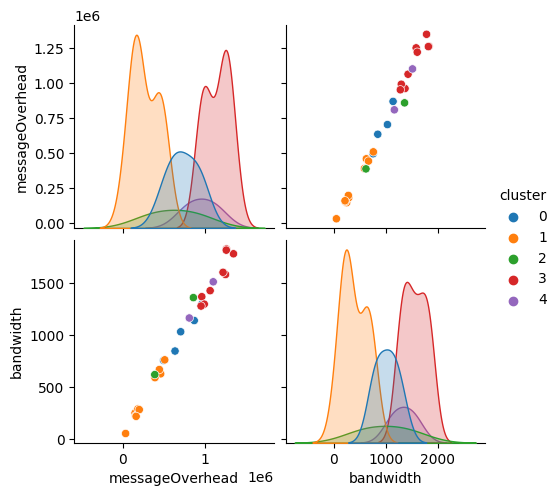

In [13]:
palette = sns.color_palette(n_colors=5)

pairplot_plot = sns.pairplot(df_CLUSTERS[['messageOverhead','bandwidth',
                       'cluster']], hue="cluster", palette=palette)

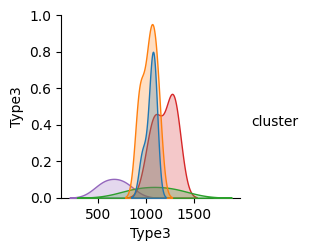

In [14]:
palette = sns.color_palette(n_colors=5)

pairplot_plot = sns.pairplot(df_CLUSTERS[['Type3',
                       'cluster']], hue="cluster", palette=palette)

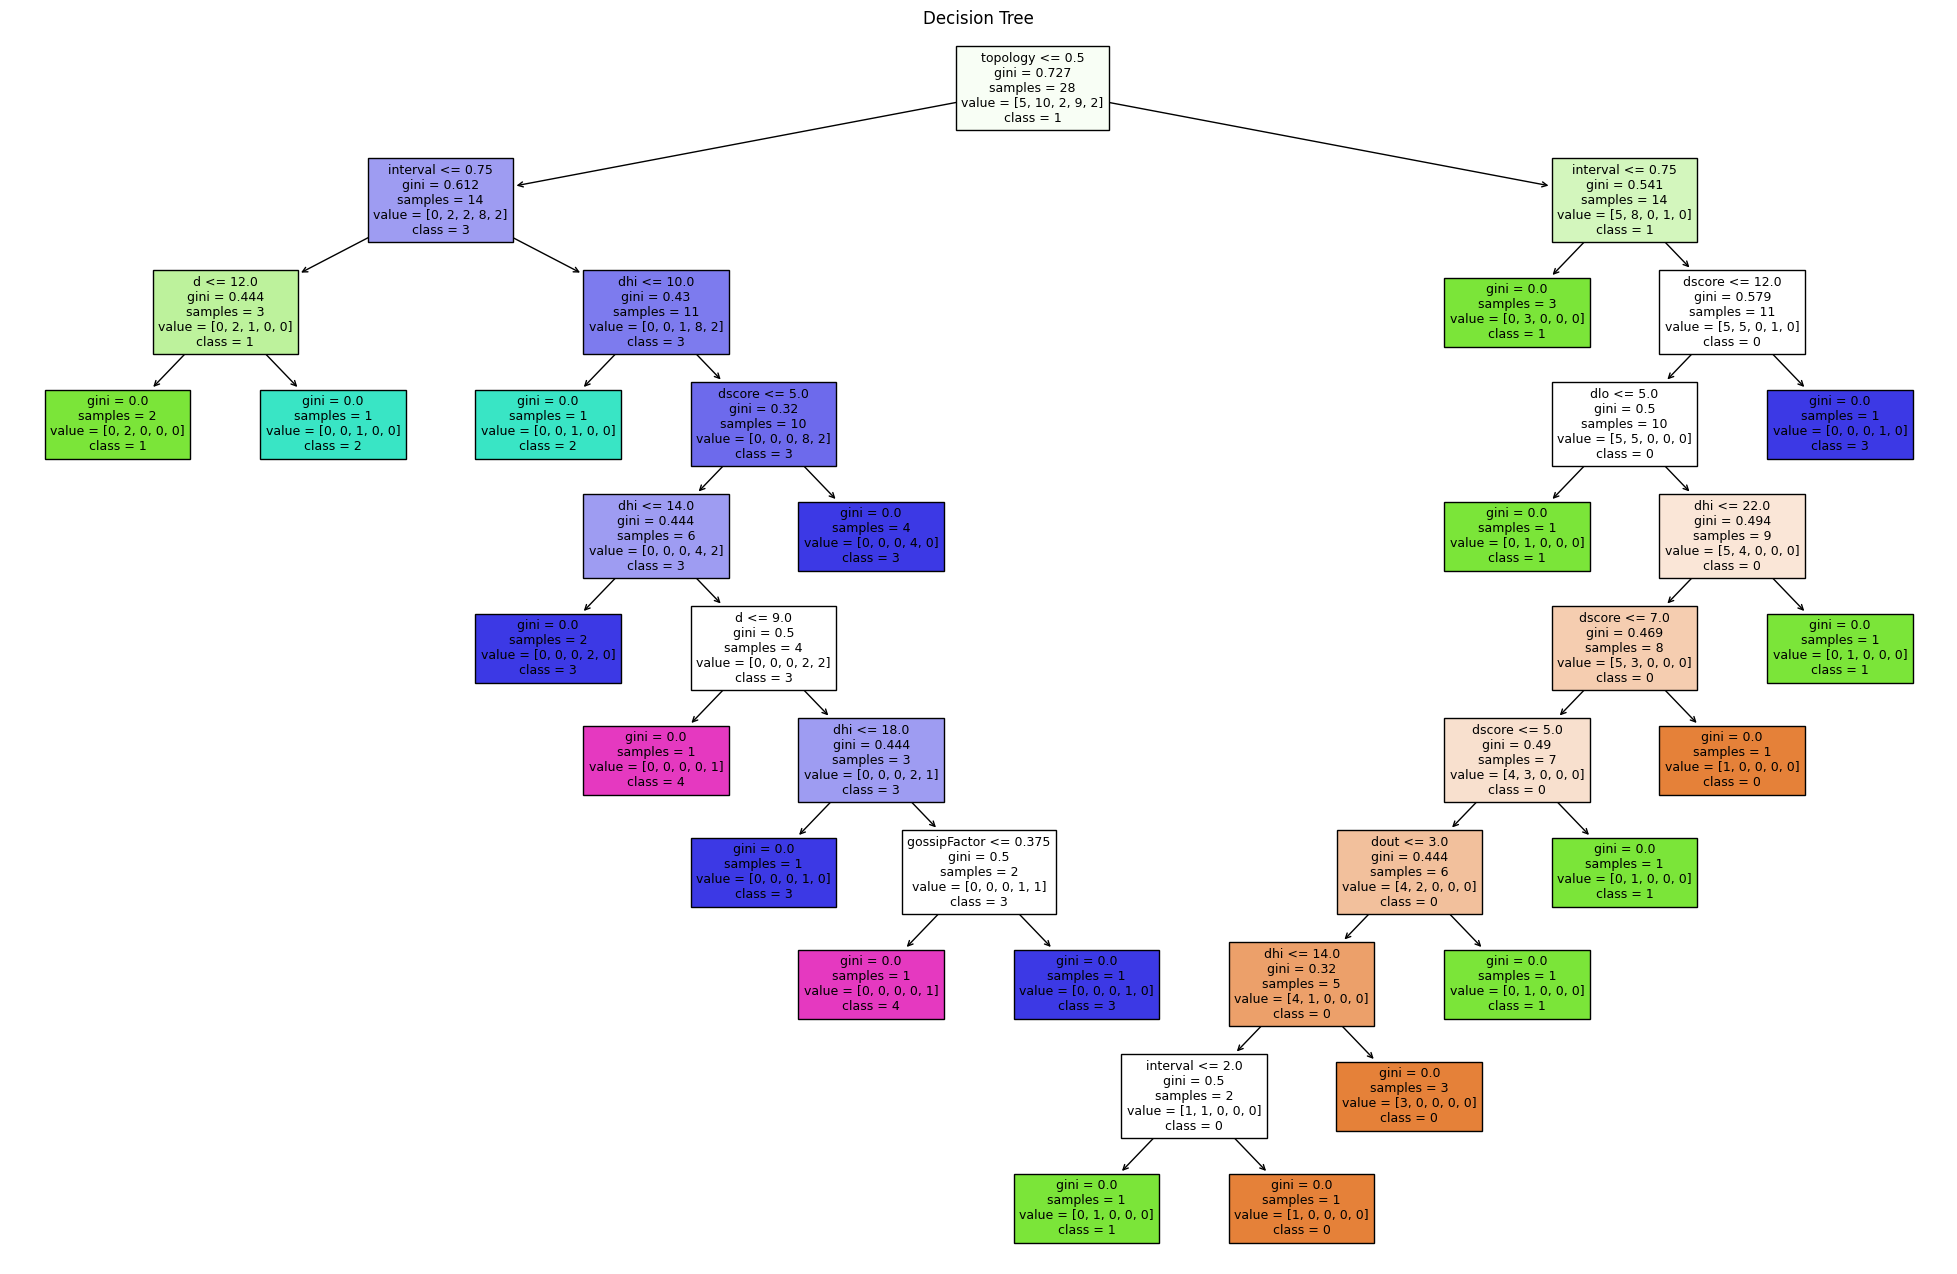

In [15]:
df_tree=df_CLUSTERS.copy()

codes = {'unl':0, 'general':1}
df_tree['topology'] = df_tree['topology'].map(codes)

X=df_tree[['topology', 'd', 'dlo', 'dhi', 'dscore',
       'dlazy', 'dout', 'gossipFactor', 'interval']]
y=np.array(df_tree['cluster'].tolist())

clf = DecisionTreeClassifier()

# Fit the model to the data
clf.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(25, 16))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0','1', '2','3', '4'], fontsize=9)
plt.title("Decision Tree")
plt.savefig('./dtree.pdf', format="pdf")

In [16]:
text_representation = tree.export_text(clf, feature_names=['topology', 'd', 'dlo', 'dhi', 'dscore',
       'dlazy', 'dout', 'gossipFactor', 'interval'])
print(text_representation)

|--- topology <= 0.50
|   |--- interval <= 0.75
|   |   |--- d <= 12.00
|   |   |   |--- class: 1
|   |   |--- d >  12.00
|   |   |   |--- class: 2
|   |--- interval >  0.75
|   |   |--- dhi <= 10.00
|   |   |   |--- class: 2
|   |   |--- dhi >  10.00
|   |   |   |--- dscore <= 5.00
|   |   |   |   |--- dhi <= 14.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- dhi >  14.00
|   |   |   |   |   |--- d <= 9.00
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- d >  9.00
|   |   |   |   |   |   |--- dhi <= 18.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- dhi >  18.00
|   |   |   |   |   |   |   |--- gossipFactor <= 0.38
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- gossipFactor >  0.38
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |--- dscore >  5.00
|   |   |   |   |--- class: 3
|--- topology >  0.50
|   |--- interval <= 0.75
|   |   |--- class: 1
|   |--- interval >  0.75
|   |   |--- dscore <=

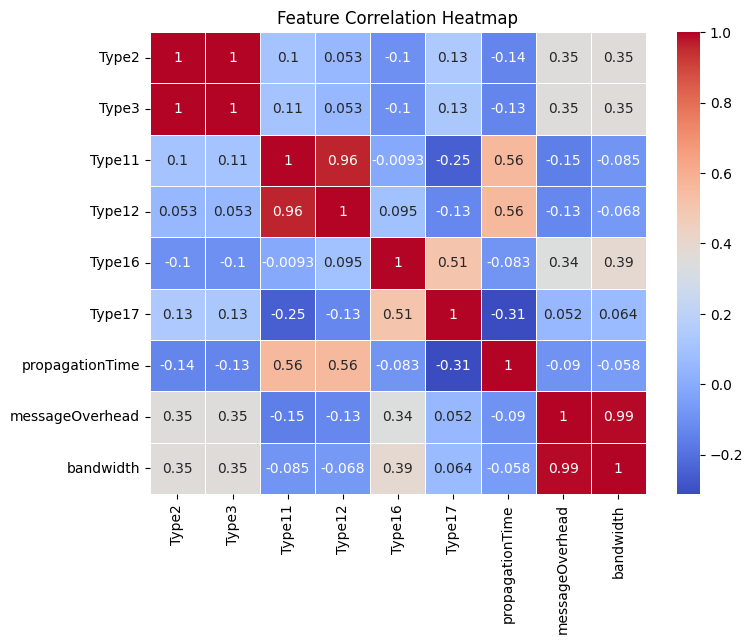

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_Clusters[['Type2', 'Type3', 'Type11', 'Type12', 'Type16', 'Type17',
       'propagationTime', 'messageOverhead', 'bandwidth']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('./figs/corr_ALL_CLUSTERS.pdf')